<a href="https://colab.research.google.com/github/roy-sub/Feature-Analysis-of-Deep-Learning-Model/blob/main/melSpectrogram/ACT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Divide the Original Dataset Based on "emo_attr"**

In [1]:
# Specify the original dataset_path

originial_dataset = '/content/Mel.xlsx'

In [2]:
import pandas as pd

df = pd.read_excel(originial_dataset)

# Assuming df is your original DataFrame
unique_values = df['emo_attr'].unique()

# Create and save separate DataFrames for each unique value
for value in unique_values:
    df_n = df[df['emo_attr'] == value]
    globals()[f'df_{value}'] = df_n
    df_n.to_csv(f'df_{value}.csv', index=False)
    print(f"Number of rows in df_{value}: {len(df_n)}")

print(f"Number of rows in df    : {len(df)}")

Number of rows in df_Dom: 160
Number of rows in df_Val: 160
Number of rows in df_Act: 160
Number of rows in df    : 480


#**Visualizing the variation of "Testing Avg CCC" with "Unique Sets of Hyper parameters"**

In [3]:
# Re-assigining the dataframe variable to the sub dataframe

import pandas as pd

df_ACT = pd.read_csv('/content/df_Act.csv')
df = df_ACT

In [4]:
df.head()

,input_dim,emo_attr,feature_name,batch_size,hidden_dim,iterations,lr,statistical_feature,Testing Avg CCC
0,128,Act,mel,64,512,2000,0.0005,none,0.023203
1,128,Act,mel,128,128,2000,0.0005,std,0.077472
2,128,Act,mel,64,512,2000,0.0005,none,0.050579
3,128,Act,mel,512,256,2000,0.0003,std,0.066773
4,128,Act,mel,64,512,2000,0.0005,none,0.043150


In [5]:
df.tail()

,input_dim,emo_attr,feature_name,batch_size,hidden_dim,iterations,lr,statistical_feature,Testing Avg CCC
155,128,Act,mel,128,512,2000,0.0005,var,0.000060
156,128,Act,mel,512,128,2000,0.0003,median,-0.028325
157,128,Act,mel,128,128,2000,0.0003,none,-0.025796
158,128,Act,mel,128,128,2000,0.0003,mean,-0.051375
159,128,Act,mel,512,64,2000,0.0003,max,0.015742


In [6]:
statistics = df['Testing Avg CCC'].describe()

# Print the statistics
statistics

count    160.000000
mean       0.006398
std        0.040288
min       -0.165063
25%       -0.011922
50%        0.000153
75%        0.029321
max        0.131708
Name: Testing Avg CCC, dtype: float64

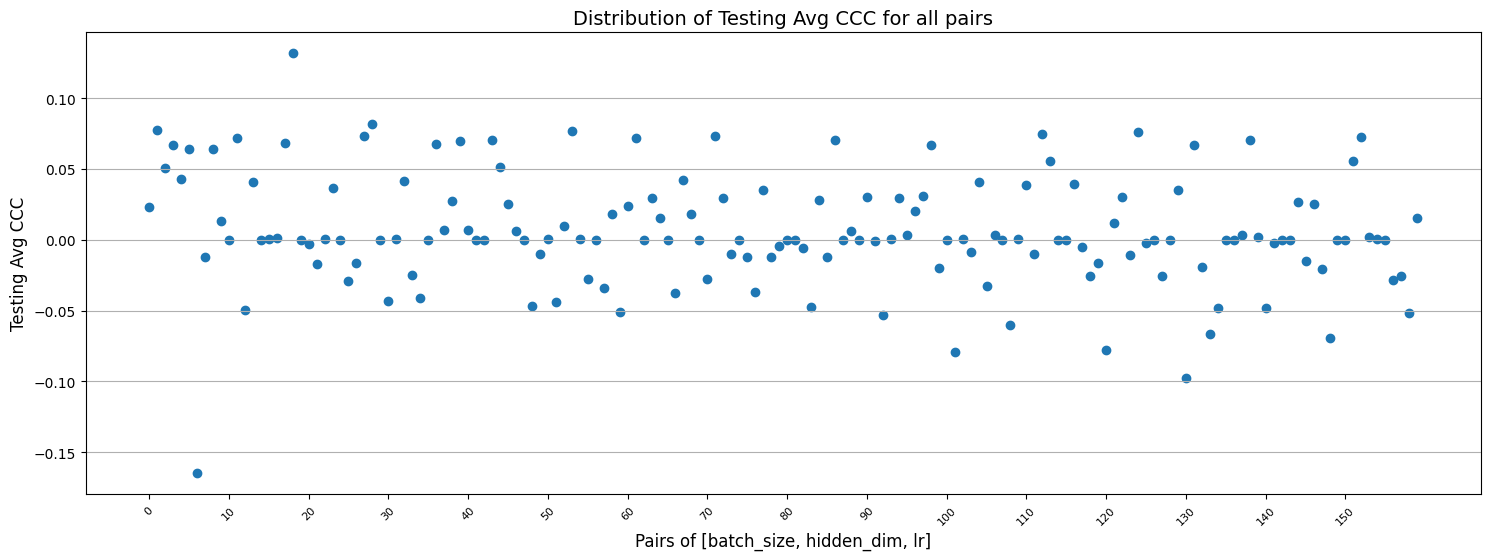

In [7]:
import matplotlib.pyplot as plt
import pandas as pd

plt.figure(figsize=(18, 6))
plt.scatter(range(len(df)), df['Testing Avg CCC'])
plt.xlabel('Pairs of [batch_size, hidden_dim, lr]', fontsize=12)
plt.ylabel('Testing Avg CCC', fontsize=12)
plt.title('Distribution of Testing Avg CCC for all pairs', fontsize=14)
plt.xticks(range(0, len(df), 10), df.index[::10], rotation=45, fontsize=8)
plt.grid(axis='y')
plt.show()

In [8]:
unique_pairs = df[['batch_size', 'hidden_dim', 'lr']].drop_duplicates()
unique_pairs

,batch_size,hidden_dim,lr
0,64,512,0.0005
1,128,128,0.0005
3,512,256,0.0003
5,512,128,0.0003
6,512,64,0.0001
7,128,512,0.0003
8,512,256,0.0005
10,64,64,0.0003
11,512,512,0.0003
12,128,512,0.0005


In [9]:
len(unique_pairs) # must be <= 36

31

In [10]:
import pandas as pd

# Assuming df is your original DataFrame

# Get unique pairs of ['batch_size', 'hidden_dim', 'lr']
unique_pairs = df[['batch_size', 'hidden_dim', 'lr']].drop_duplicates()

# Create an empty DataFrame to store the result
df_new = pd.DataFrame(columns=['unique pairs of hyperparameters', 'Testing Avg CCCs'])

# Iterate over unique pairs and collect Testing Avg CCC values
for index, row in unique_pairs.iterrows():
    mask = (df['batch_size'] == row['batch_size']) & \
           (df['hidden_dim'] == row['hidden_dim']) & \
           (df['lr'] == row['lr'])
    testing_avg_ccc_values = df[mask]['Testing Avg CCC'].tolist()
    hyperparameters_list = [row['batch_size'], row['hidden_dim'], row['lr']]
    df_to_append = pd.DataFrame({'unique pairs of hyperparameters': [hyperparameters_list], 'Testing Avg CCCs': [testing_avg_ccc_values]})
    df_new = pd.concat([df_new, df_to_append], ignore_index=True)

df_new.head()

,unique pairs of hyperparameters,Testing Avg CCCs
0,"[64.0, 512.0, 0.0005]","[0.023202618653886, 0.0505794461816549, 0.0431..."
1,"[128.0, 128.0, 0.0005]","[0.0774717142184575, -9.53455062699504e-05, 0...."
2,"[512.0, 256.0, 0.0003]","[0.066773414860169, 0.0735064084331194, -2.653..."
3,"[512.0, 128.0, 0.0003]","[0.064175134897232, -0.0527541349331537, -0.02..."
4,"[512.0, 64.0, 0.0001]","[-0.165063229699929, 0.0005808786004005, -0.01..."


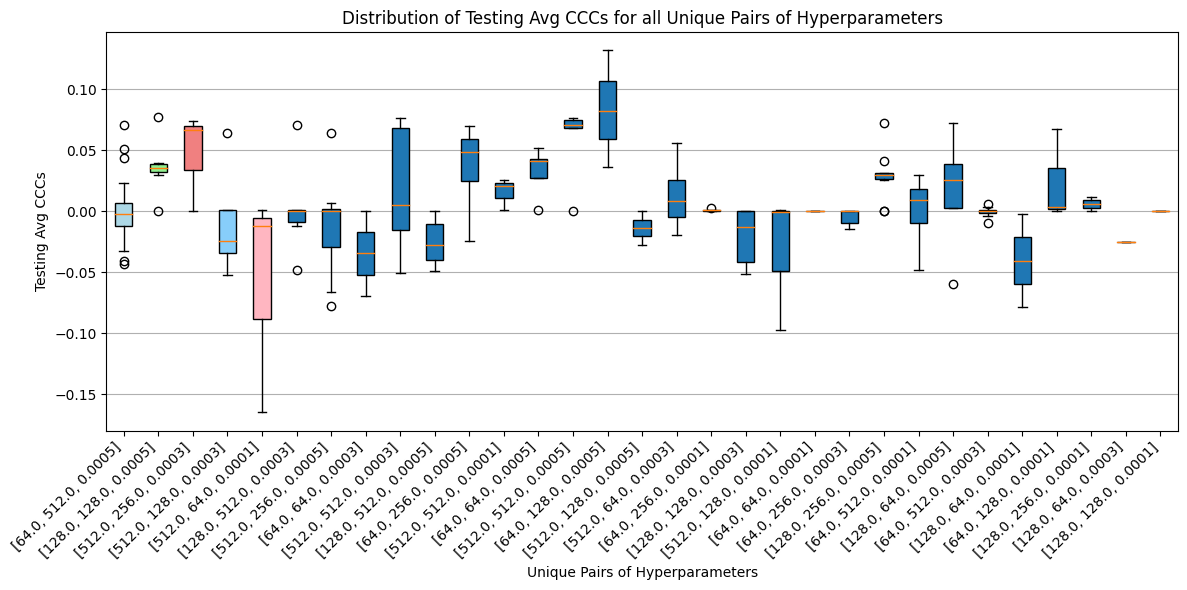

In [11]:
# Diagrammatic Representation
plt.figure(figsize=(12, 6))
box = plt.boxplot(df_new['Testing Avg CCCs'], labels=df_new['unique pairs of hyperparameters'], patch_artist=True)

# Customizing boxplot colors
colors = ['lightblue', 'lightgreen', 'lightcoral', 'lightskyblue', 'lightpink']
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)

plt.xticks(rotation=45, ha='right')
plt.xlabel('Unique Pairs of Hyperparameters')
plt.ylabel('Testing Avg CCCs')
plt.title('Distribution of Testing Avg CCCs for all Unique Pairs of Hyperparameters')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

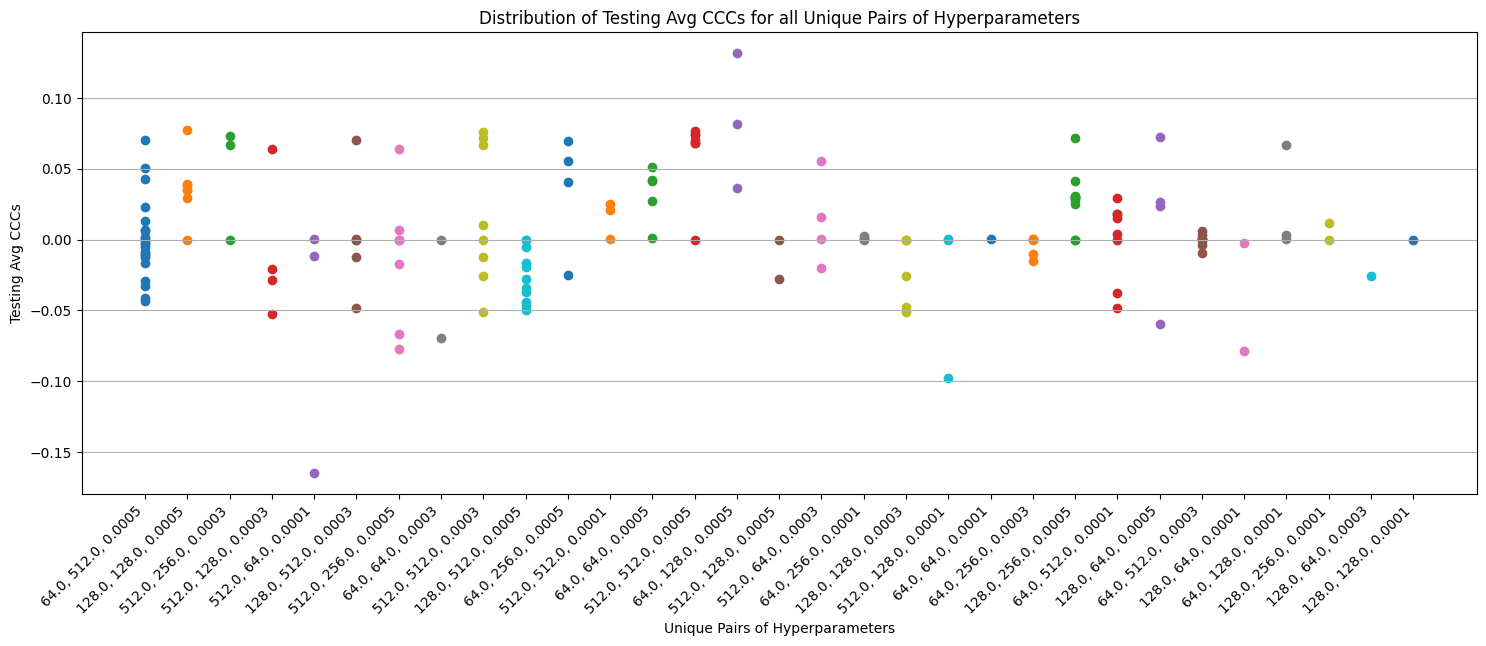

In [12]:
import matplotlib.pyplot as plt

# Create a scatter plot
plt.figure(figsize=(18, 6))
for i, row in df_new.iterrows():
    pair_str = ', '.join([str(x) for x in row['unique pairs of hyperparameters']])
    plt.scatter([pair_str]*len(row['Testing Avg CCCs']), row['Testing Avg CCCs'], label=pair_str)

plt.xlabel('Unique Pairs of Hyperparameters')
plt.ylabel('Testing Avg CCCs')
plt.title('Distribution of Testing Avg CCCs for all Unique Pairs of Hyperparameters')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.show()

#**Filter the Dataframe based on the "Unique Set of Hyper Parameneter"**

In [13]:
# Assigning batch_size,	hidden_dim and lr to the selected values

[batch_size_high_ccc,	hidden_dim_high_ccc, lr_high_ccc] = [64.0, 128.0, 0.0005]
[batch_size_low_ccc,	hidden_dim_low_ccc, lr_low_ccc] = [128.0, 512.0, 0.0005]
[batch_size_sparse_ccc,	hidden_dim_sparse_ccc, lr_spare_ccc] = [64.0, 512.0, 0.0005]

print(f"batch_size_high_ccc : {batch_size_high_ccc} \nhidden_dim_high_ccc : {hidden_dim_high_ccc} \nlr_high_ccc : {lr_high_ccc}\n")
print(f"batch_size_low_ccc : {batch_size_low_ccc} \nhidden_dim_low_ccc : {hidden_dim_low_ccc} \nlr_high_ccc : {lr_low_ccc}\n")
print(f"batch_size_sparse_ccc : {batch_size_sparse_ccc} \nhidden_dim_sparse_ccc : {hidden_dim_sparse_ccc} \nlr_spare_ccc : {lr_spare_ccc}")

batch_size_high_ccc : 64.0 
hidden_dim_high_ccc : 128.0 
lr_high_ccc : 0.0005

batch_size_low_ccc : 128.0 
hidden_dim_low_ccc : 512.0 
lr_high_ccc : 0.0005

batch_size_sparse_ccc : 64.0 
hidden_dim_sparse_ccc : 512.0 
lr_spare_ccc : 0.0005


In [14]:
df_filtered_high = df[(df['batch_size'] == batch_size_high_ccc) & (df['hidden_dim'] == hidden_dim_high_ccc) & (df['lr'] == lr_high_ccc)]
df_filtered_low = df[(df['batch_size'] == batch_size_low_ccc) & (df['hidden_dim'] == hidden_dim_low_ccc) & (df['lr'] == lr_low_ccc)]
df_filtered_sparse = df[(df['batch_size'] == batch_size_sparse_ccc) & (df['hidden_dim'] == hidden_dim_sparse_ccc) & (df['lr'] == lr_spare_ccc)]

In [15]:
df_filtered_high = df_filtered_high.reset_index(drop=True)
df_filtered_low = df_filtered_low.reset_index(drop=True)
df_filtered_sparse = df_filtered_sparse.reset_index(drop=True)

In [16]:
df_filtered_high.head()

,input_dim,emo_attr,feature_name,batch_size,hidden_dim,iterations,lr,statistical_feature,Testing Avg CCC
0,128,Act,mel,64,128,2000,0.0005,all,0.131708
1,128,Act,mel,64,128,2000,0.0005,all,0.036340
2,128,Act,mel,64,128,2000,0.0005,all,0.081765


In [17]:
df_filtered_low.head()

,input_dim,emo_attr,feature_name,batch_size,hidden_dim,iterations,lr,statistical_feature,Testing Avg CCC
0,128,Act,mel,128,512,2000,0.0005,none,-0.049445
1,128,Act,mel,128,512,2000,0.0005,none,-0.016533
2,128,Act,mel,128,512,2000,0.0005,mean,-0.046704
3,128,Act,mel,128,512,2000,0.0005,mean,-0.043862
4,128,Act,mel,128,512,2000,0.0005,mean,-0.034180


In [18]:
df_filtered_sparse.head()

,input_dim,emo_attr,feature_name,batch_size,hidden_dim,iterations,lr,statistical_feature,Testing Avg CCC
0,128,Act,mel,64,512,2000,0.0005,none,0.023203
1,128,Act,mel,64,512,2000,0.0005,none,0.050579
2,128,Act,mel,64,512,2000,0.0005,none,0.043150
3,128,Act,mel,64,512,2000,0.0005,none,0.013534
4,128,Act,mel,64,512,2000,0.0005,mean,-0.002882


In [19]:
print(f"df_filtered_high: {len(df_filtered_high)} \ndf_filtered_low: {len(df_filtered_low)} \ndf_filtered_sparse: {len(df_filtered_sparse)}")

df_filtered_high: 3 
df_filtered_low: 11 
df_filtered_sparse: 22


#**Perform the Analysis to Determine the Most Efficient "statistical_feature"**

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

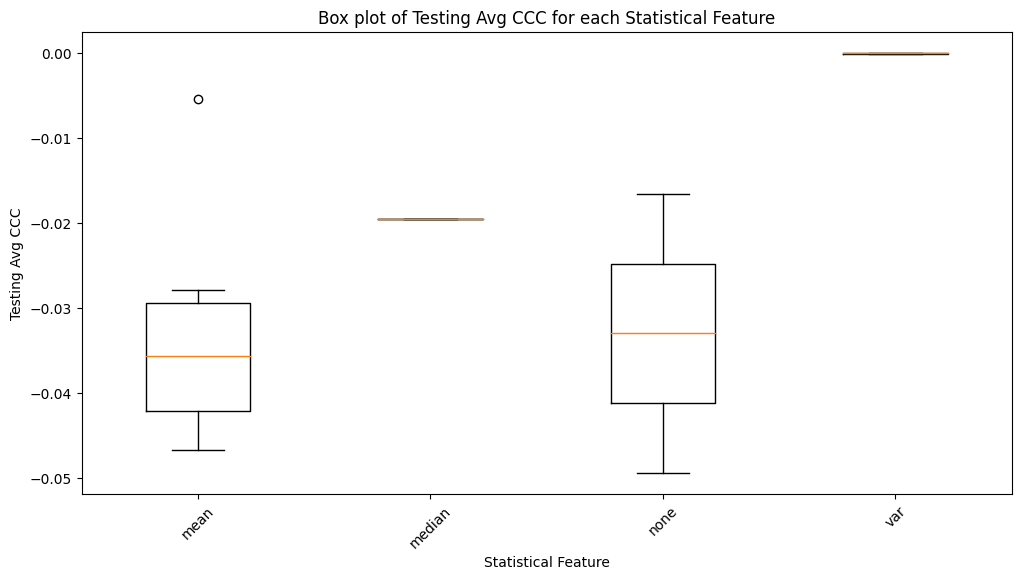

In [21]:
# Create an empty list to store box plot data
boxplot_data = []

# Group the DataFrame by "statistical_feature"
grouped = df_filtered_low.groupby('statistical_feature')

# Create a box plot for each group
for name, group in grouped:
    boxplot_data.append(group['Testing Avg CCC'])

# Create a box plot
plt.figure(figsize=(12, 6))
plt.boxplot(boxplot_data, labels=grouped.groups.keys())
plt.xlabel('Statistical Feature')
plt.ylabel('Testing Avg CCC')
plt.title('Box plot of Testing Avg CCC for each Statistical Feature')
plt.xticks(rotation=45)
plt.show()

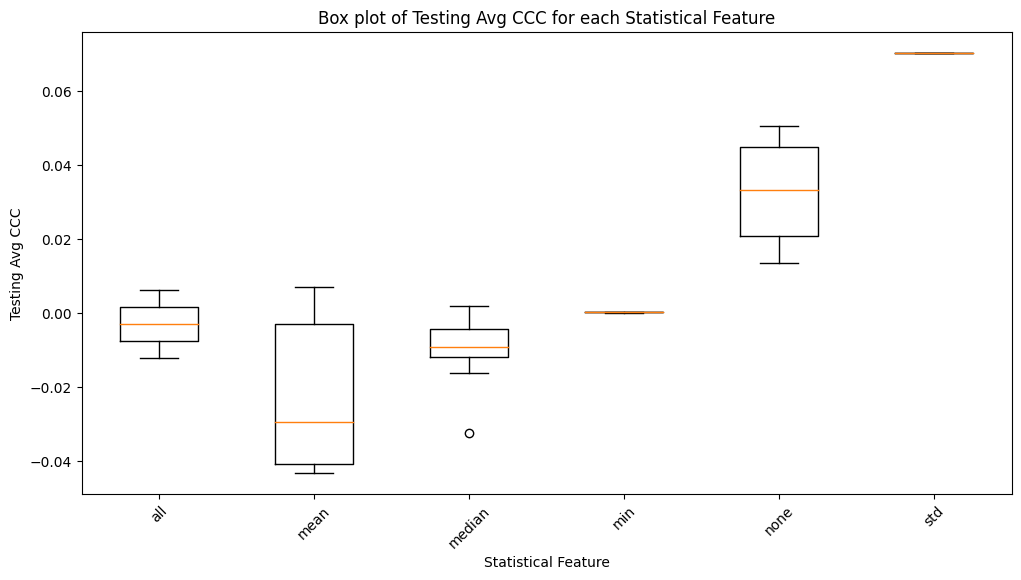

In [22]:
# Create an empty list to store box plot data
boxplot_data = []

# Group the DataFrame by "statistical_feature"
grouped = df_filtered_sparse.groupby('statistical_feature')

# Create a box plot for each group
for name, group in grouped:
    boxplot_data.append(group['Testing Avg CCC'])

# Create a box plot
plt.figure(figsize=(12, 6))
plt.boxplot(boxplot_data, labels=grouped.groups.keys())
plt.xlabel('Statistical Feature')
plt.ylabel('Testing Avg CCC')
plt.title('Box plot of Testing Avg CCC for each Statistical Feature')
plt.xticks(rotation=45)
plt.show()

#**Advanced Analysis to Determine the Most Efficient "statistical_feature"**

In [24]:
! pip install -q eli5
! pip install -q shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.2/216.2 kB 5.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 538.2/538.2 kB 11.2 MB/s eta 0:00:00


In [25]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

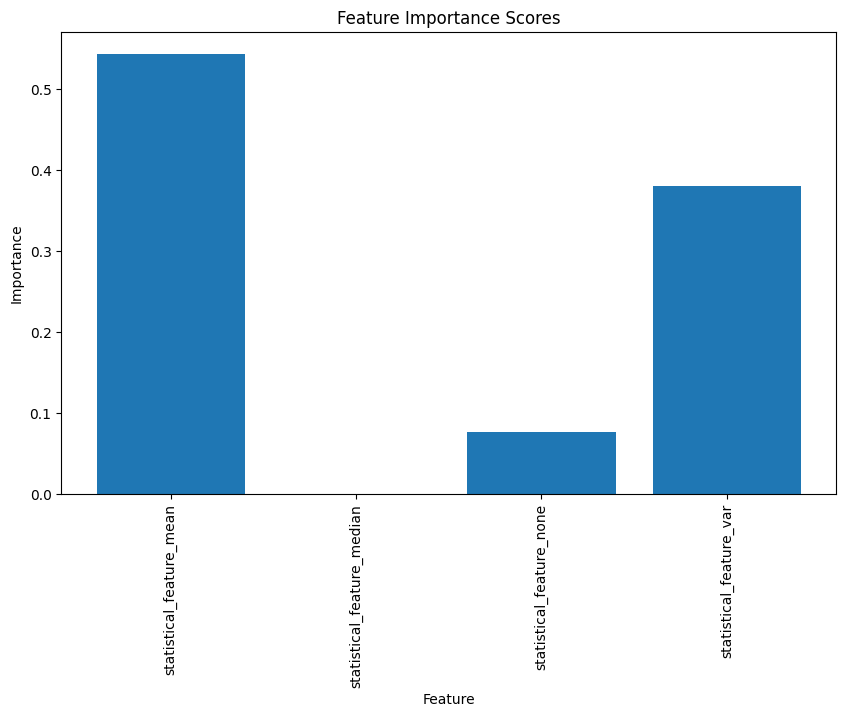

In [27]:
# Assuming df is your DataFrame
X_l = df_filtered_low[['statistical_feature']]
y_l = df_filtered_low['Testing Avg CCC']

# Convert categorical variables into numerical ones using one-hot encoding
X_encoded_l = pd.get_dummies(X_l)

X_train_l, X_test_l, y_train_l, y_test_l = train_test_split(X_encoded_l, y_l, test_size=0.2, random_state=42)

# Train a RandomForestRegressor model
model_l = RandomForestRegressor(n_estimators=100, random_state=42)
model_l.fit(X_train_l, y_train_l)

# Get feature importances
importances = model_l.feature_importances_
features = X_encoded_l.columns

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.bar(features, importances)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importance Scores')
plt.xticks(rotation=90)
plt.show()

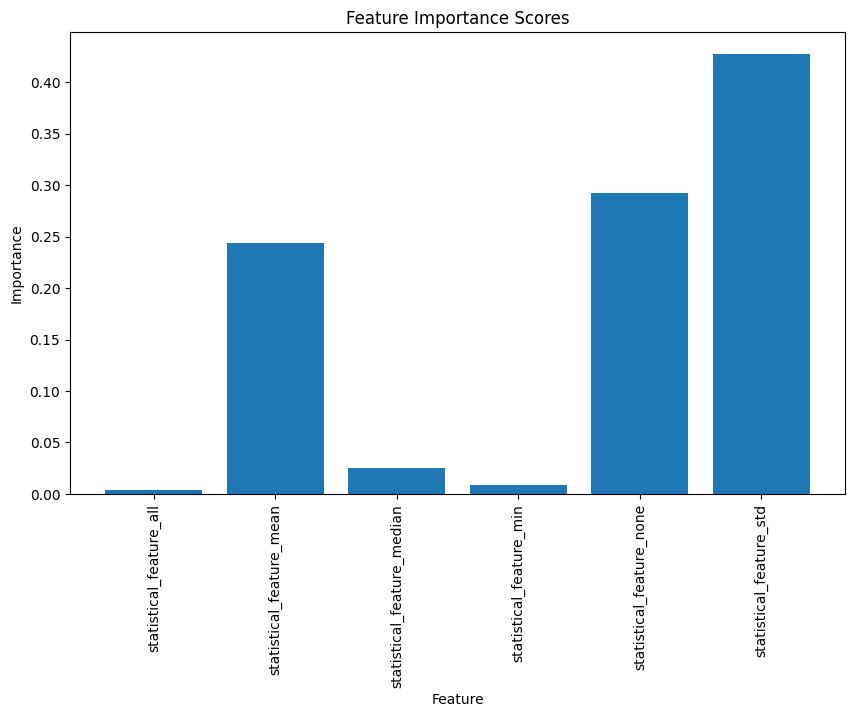

In [28]:
# Assuming df is your DataFrame
X_s = df_filtered_sparse[['statistical_feature']]
y_s = df_filtered_sparse['Testing Avg CCC']

# Convert categorical variables into numerical ones using one-hot encoding
X_encoded_s = pd.get_dummies(X_s)

X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(X_encoded_s, y_s, test_size=0.2, random_state=42)

# Train a RandomForestRegressor model
model_s = RandomForestRegressor(n_estimators=100, random_state=42)
model_s.fit(X_train_s, y_train_s)

# Get feature importances
importances = model_s.feature_importances_
features = X_encoded_s.columns

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.bar(features, importances)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importance Scores')
plt.xticks(rotation=90)
plt.show()

In [33]:
import eli5
from eli5.sklearn import PermutationImportance

In [34]:
perm_l = PermutationImportance(model_l, random_state=42).fit(X_test_l , y_test_l )
eli5.show_weights(perm_l, feature_names=X_test_l .columns.tolist())

Weight,Feature
0.0846 ± 0.2072,statistical_feature_none
0 ± 0.0000,statistical_feature_var
0 ± 0.0000,statistical_feature_median
-0.1263 ± 1.2387,statistical_feature_mean


In [35]:
perm_s = PermutationImportance(model_s, random_state=42).fit(X_test_s , y_test_s )
eli5.show_weights(perm_s, feature_names=X_test_s .columns.tolist())

Weight,Feature
0.2804 ± 0.2924,statistical_feature_none
0.0767 ± 0.0241,statistical_feature_median
0 ± 0.0000,statistical_feature_std
0 ± 0.0000,statistical_feature_min
0 ± 0.0000,statistical_feature_all
-0.2992 ± 0.3499,statistical_feature_mean


In [32]:
import shap

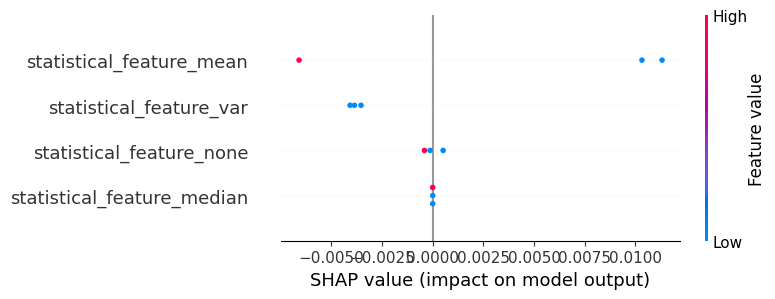

In [30]:
explainer_l = shap.TreeExplainer(model_l)
shap_values_l = explainer_l.shap_values(X_test_l)
shap.summary_plot(shap_values_l, X_test_l)

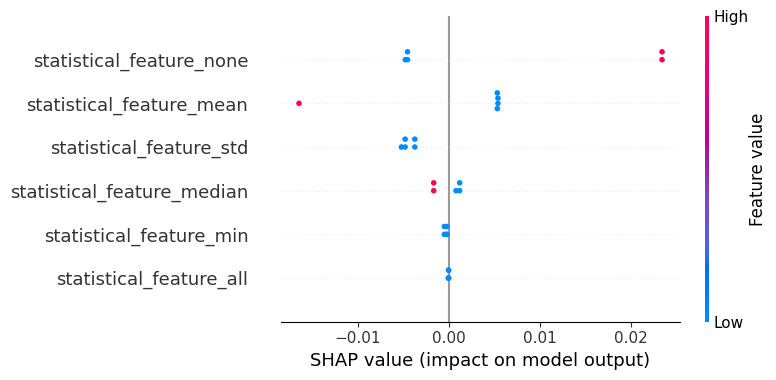

In [31]:
explainer_s = shap.TreeExplainer(model_s)
shap_values_s = explainer_s.shap_values(X_test_s)
shap.summary_plot(shap_values_s, X_test_s)